# 16.FBprophet

------

In [1]:
!pip install fbprophet

In [1]:
from fbprophet.plot import plot_plotly, plot_components_plotly


from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import math

import plotly.offline as pyoff
import plotly.graph_objs as go



In [2]:
%store -r df_cuf #load dataset generated in other Exploration notebook
df_cuf

no stored variable or alias #load
no stored variable or alias dataset
no stored variable or alias generated
no stored variable or alias in
no stored variable or alias other
no stored variable or alias Exploration
no stored variable or alias notebook


COD_UNIDADE                             DESCR_SERVICO  N_REG_OPER  \
0               11                            CIRURGIA GERAL       57172   
1               11                              OFTALMOLOGIA       59413   
2               11                                  UROLOGIA       56967   
3               11                                  UROLOGIA       58039   
4               11                                  UROLOGIA       58735   
...            ...                                       ...         ...   
186974           6                              OFTALMOLOGIA       87550   
186975           6                              OFTALMOLOGIA       88569   
186976           6                                 ORTOPEDIA       88554   
186977           6                                 ORTOPEDIA       87886   
186978           6  CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA       88544   

           MEDICO  DOENTE_LOCAL  DOENTE_UNICO SEXO DT_NASCIMENTO    DT_OPER  \
0       132273102        508345     7821535.0    M    1952-02-11 2017-04-18   
1       093935231        510545     4597035.0    M    1946-03-31 2017-07-26   
2       775653212        510545     4597035.0    M    1946-03-31 2017-04-06   
3       462002202        510545     4597035.0    M    1946-03-31 2017-05-22   
4       462002202        510545     4597035.0    M    1946-03-31 2017-06-26   
...           ...           ...           ...  ...           ...        ...   
186974  248562262       2238895           NaN  NaN           NaT 2020-10-07   
186975  248562262       2238895           NaN  NaN           NaT 2020-11-04   
186976  381371271       2901575           NaN  NaN           NaT 2020-11-04   
186977  514138822       1321920           NaN  NaN           NaT 2020-10-16   
186978    7310005       1418500           NaN  NaN           NaT 2020-11-04   

         BLOCO  ... TIME_RECOVERYROOM DUR_PLANEADA_m SurgeryNumber  \
0          BOC  ...               NaN             60             4   
1          BOC  ...               NaN             60             2   
2          BOC  ...               NaN             60             1   
3          BOC  ...             134.0             60             1   
4          BOC  ...              97.0             60             1   
...        ...  ...               ...            ...           ...   
186974  BOC010  ...              72.0             30             1   
186975  BOC010  ...              32.0             15             1   
186976  BOC010  ...             253.0            120             1   
186977  BOC010  ...              14.0            120             1   
186978  BOC010  ...              18.0            120             2   

       SurgeryPerformed_perDoctor DailySurgery_perOR   AGE  Match  \
0                              78                  5  65.0  False   
1                              51                  2  71.0  False   
2                              51                  4  71.0  False   
3                              28                  6  71.0  False   
4                              34                  6  71.0  False   
...                           ...                ...   ...    ...   
186974                         21                  5   NaN  False   
186975                         24                  7   NaN  False   
186976                         20                  2   NaN  False   
186977                        119                  1   NaN  False   
186978                         35                  1   NaN  False   

       Procedures_I day-of-week    part_of_day  
0                 1     Tuesday    Noon(13-16)  
1                 1   Wednesday  Morning(9-12)  
2                 1    Thursday    Noon(13-16)  
3                 3      Monday     Eve(17-20)  
4                 1      Monday     Eve(17-20)  
...             ...         ...            ...  
186974            1   Wednesday     Eve(17-20)  
186975            1   Wednesday   Night(21-24)  
186976            1   Wednesday   

* ### 16.1. General Forecasting  <a class="anchor" id="16.1"></a> 

In [3]:
surgeries=pd.DataFrame(df_cuf.groupby('DT_OPER').size()) #count number of surgeries per day of the year

for col in surgeries.columns: 

    surgeries = surgeries.rename(columns = {col: 'Surgeries'} )
    
surgeries = surgeries.reset_index() #reset the index
surgeries = surgeries.rename(columns = {'Surgeries': 'y','DT_OPER': 'ds'} ) #change name of columns

In [4]:
surgeries

ds    y
0    2017-01-01    1
1    2017-01-02  101
2    2017-01-03  178
3    2017-01-04  150
4    2017-01-05  161
...         ...  ...
1454 2020-12-27    7
1455 2020-12-28  124
1456 2020-12-29  132
1457 2020-12-30   90
1458 2020-12-31   13

[1459 rows x 2 columns]

In [5]:
# Python
m = Prophet()


In [6]:
m.fit(surgeries)
future = m.make_future_dataframe(periods=365)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0    2017-01-01  -29.845992  -80.148568   21.724310
1    2017-01-02  133.562998   79.594435  190.986950
2    2017-01-03  135.437548   82.170461  187.617195
3    2017-01-04  136.463916   83.608134  187.788270
4    2017-01-05  145.918740   93.054953  199.471561
...         ...         ...         ...         ...
1819 2021-12-27  135.265822   83.962259  188.008460
1820 2021-12-28  134.048589   79.939992  188.983218
1821 2021-12-29  132.146265   78.852550  186.997097
1822 2021-12-30  138.888086   85.998696  189.503514
1823 2021-12-31  136.566792   85.481472  186.945290

[1824 rows x 4 columns]

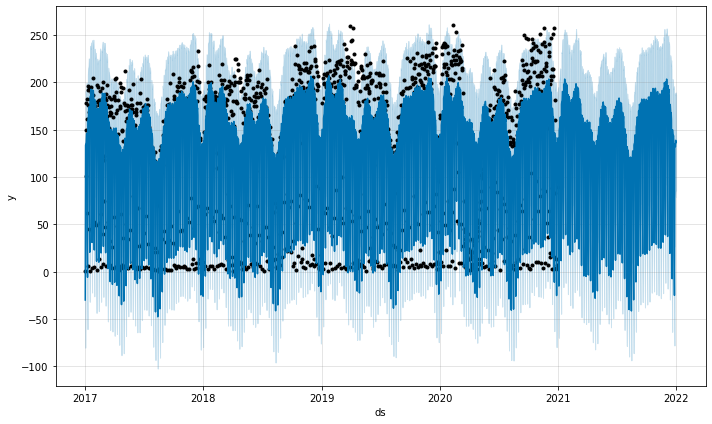

In [8]:
fig1 = m.plot(forecast)

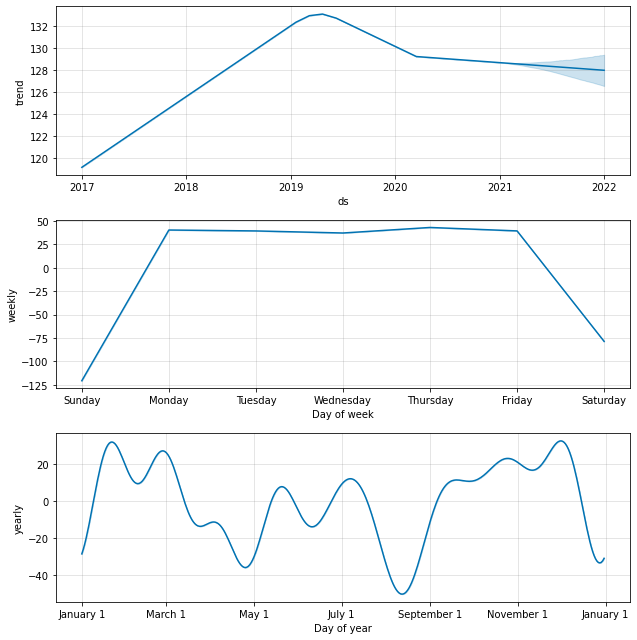

In [9]:
fig2 = m.plot_components(forecast)

* ### 16.2. General Forecasting -remove all the weekends from our data  <a class="anchor" id="16.2"></a> 

In [10]:
# Removing weekends
surgeries.set_index('ds', inplace=True)
surgeries = surgeries[surgeries.index.dayofweek < 5].reset_index()
#Plot
fig = go.Figure()
#Create and style traces
fig.add_trace(go.Scatter(x=surgeries['ds'], y=surgeries['y'], name='Rides',))
fig.show()

In [11]:
# Get hold of the Prophet object
m = Prophet()
 
# Fit the data. Remember that prophet expect "ds" and "y" as names for the columns.
m.fit(surgeries)
 
# We must create a data frame holding dates for our forecast. The periods # parameter counts days as long as the frequency is 'D' for the day. Let's # do a 180 day forecast, approximately half a year.
future = m.make_future_dataframe(periods=365, freq='D')
# Create the forecast object which will hold all of the resulting data from the forecast.
forecast = m.predict(future)
# List the predicted values with a lower and upper band.

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds        yhat  yhat_lower  yhat_upper
0    2017-01-02  122.421670   64.369264  182.228876
1    2017-01-03  125.337004   64.128375  181.141217
2    2017-01-04  127.481794   68.583489  184.937736
3    2017-01-05  138.176344   75.715779  195.122981
4    2017-01-06  139.561730   80.764616  201.212507
...         ...         ...         ...         ...
1403 2021-12-27  114.999845   51.775710  172.266907
1404 2021-12-28  113.724454   55.637844  173.101699
1405 2021-12-29  111.893647   49.720415  169.324877
1406 2021-12-30  118.899247   57.182330  177.718492
1407 2021-12-31  116.948620   57.634899  172.299068

[1408 rows x 4 columns]

<ipython-input-12-6ecb1d84e3c5>:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-12-6ecb1d84e3c5>:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



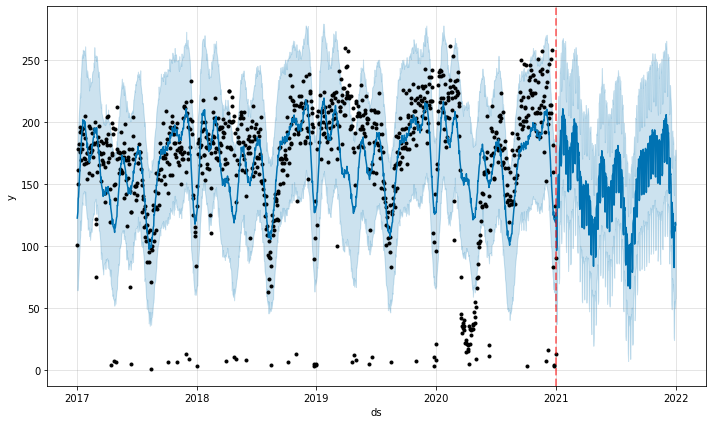

In [12]:
# Plotting with Prophet built-in method
fig = m.plot(forecast)
ax = fig.add_subplot(111)
ax.axvline(x=forecast['ds'].max() - pd.Timedelta('365 days'), c='red', lw=2, alpha=0.5, ls='--')
fig.show()

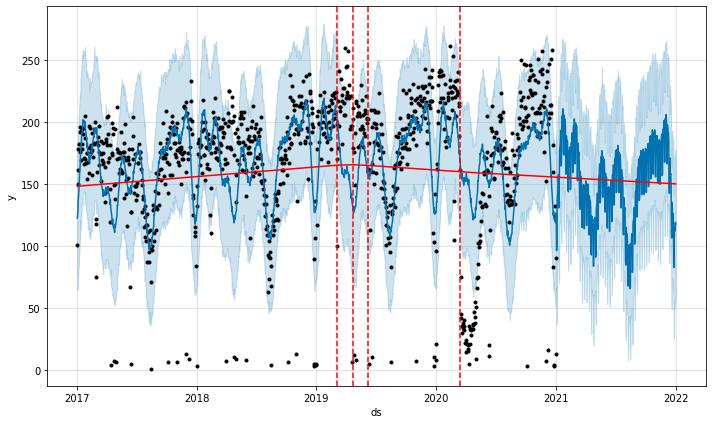

In [13]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [14]:
# Listing all the change points in the model
deltas = m.params['delta'].mean(0)
cp = pd.DataFrame(m.changepoints)
cp['deltas'] = deltas
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Bar(x=cp['ds'], y=cp['deltas'], name='CPs',))

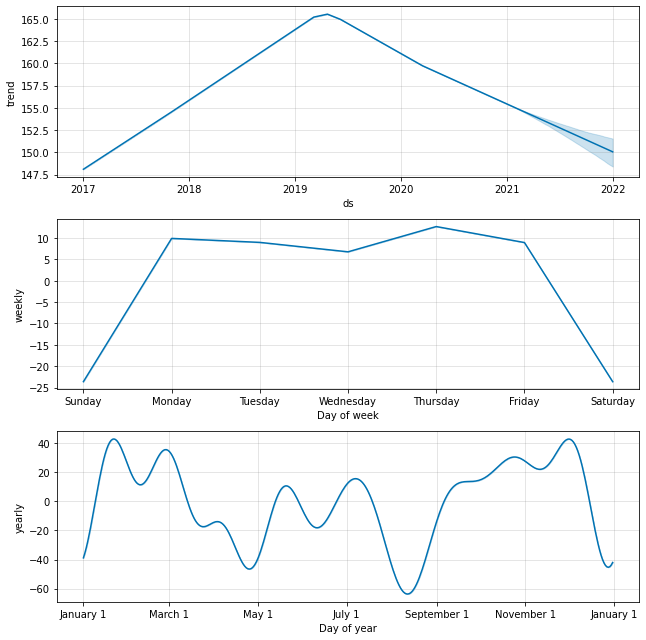

In [15]:
fig = m.plot_components(forecast)

* ### 16.3. Forecasting including an Exceptional season (Covid)  <a class="anchor" id="16.3"></a> 

In [16]:
Days_of_year=pd.DataFrame(df_cuf.groupby('DT_OPER').size()) #count number of surgeries per day of the year

for col in Days_of_year.columns: 

    Days_of_year = Days_of_year.rename(columns = {col: 'Surgeries'} )
    
Days_of_year = Days_of_year.reset_index() #reset the index
Days_of_year = Days_of_year.rename(columns = {'Surgeries': 'y','DT_OPER': 'ds'} ) #change name of columns

* Add column COVID

In [17]:
Days_of_year['COVID']=(Days_of_year['ds']>'2020-04-01') & (Days_of_year['ds']<'2020-08-01')
def covid_temp(ds):
    if ds==True:
        return 1
    else:
        return 0
Days_of_year['COVID']=Days_of_year['COVID'].apply(covid_temp)

In [18]:
# Python
m = Prophet()
m.add_regressor('COVID',standardize= False)
m.fit(Days_of_year)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=365)


In [20]:
future['COVID']=Days_of_year['COVID'] #add column covid
future['COVID'] = future['COVID'].fillna(0)

In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0    2017-01-01  -35.087820  -86.183274   16.494863
1    2017-01-02  128.454462   73.603866  181.861187
2    2017-01-03  130.571160   80.851134  182.018138
3    2017-01-04  131.817755   80.544487  182.751394
4    2017-01-05  141.706824   87.924845  190.342242
...         ...         ...         ...         ...
1819 2021-12-27  155.058797  102.225228  207.649938
1820 2021-12-28  154.032597  106.222489  206.154423
1821 2021-12-29  152.306501   96.546603  201.067099
1822 2021-12-30  159.447588  106.833965  213.254552
1823 2021-12-31  157.390788  109.264456  211.269777

[1824 rows x 4 columns]

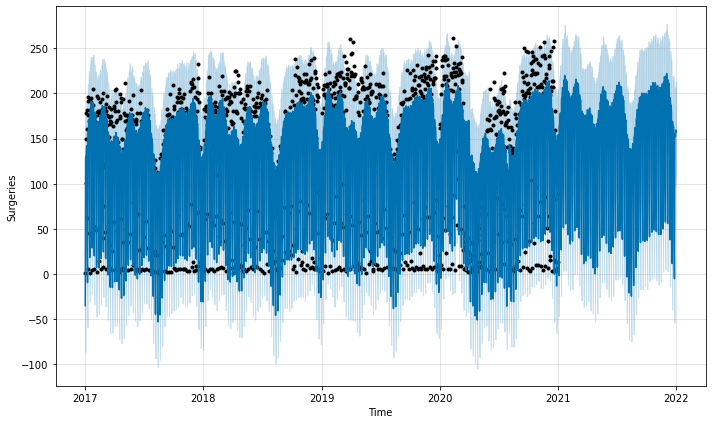

In [22]:
fig1 = m.plot(forecast,xlabel='Time',ylabel='Surgeries')

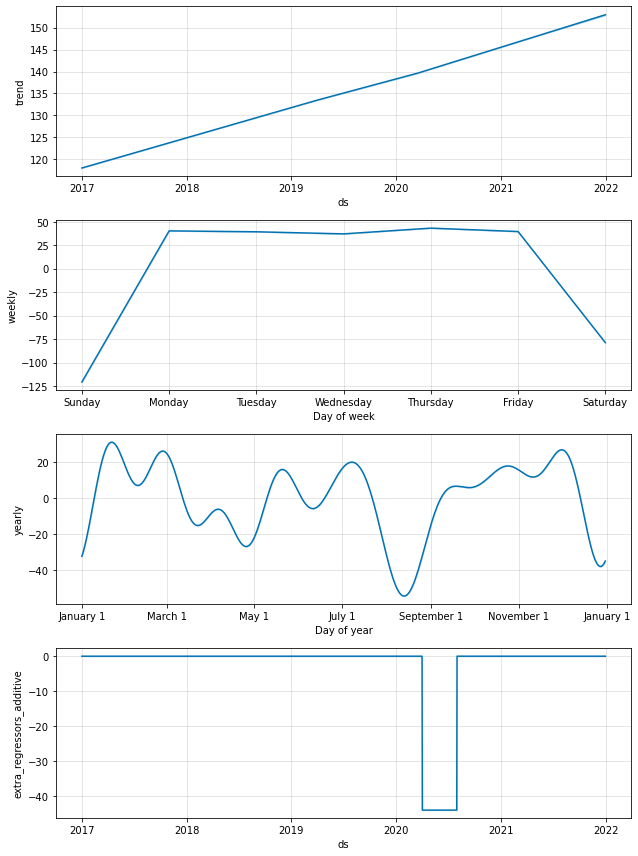

In [23]:
fig2 = m.plot_components(forecast)

In [24]:
plot_plotly(m, forecast)